## Assignment for Business Analyst Role

### Pratik G Hagawane - Business Analyst (GoMechanic)

**Dataset**: _[click here for dataset](https://c.smartrecruiters.com/sr-company-attachments-prod-dc5/5f2002718deef3182517d643/234f5dd9-c981-4cb4-8805-b5bcf1f20f13?r=s3-eu-central-1)_

**Problem Statement**: _[Click here for Problem statement](https://c.smartrecruiters.com/sr-company-attachments-prod-dc5/5f2002718deef3182517d643/47d6477a-1bdf-46ce-a545-94cd7fe80162?r=s3-eu-central-1)_

#### Column names and description:
1. userId - User Ids
2. bookingId - Trip Ids
3. bookingDate - Booking creation timestamp (IST)
4. journeyType - Type of journey
5. isInternational - Type of travel (True for International and False for Domestic)
6. providerId - Provider types
7. originCode - Origin codes
8. destinationCode - Destination codes
9. cabinClass - class (Business, Economy, etc.)
10. devicePlatform - Device on which the booking was made (iximaad-Android Flights App, iximaio-IOS Flights App, iximatr-Android Trains App, iximweb-Mobile Web,  ixiweb-Web, mmxmatr-Miscelleneous)
11. totalFare - total amount of booking
12. onwardDeparture - journey timestamp (GMT)
13. userType - type of user (First time user - New User, Booking made after long time - Reactivated User, Frequent Bookers - Old User)

In [133]:
# Importing important libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import json
import requests as re
from datetime import datetime,timedelta
from pandasql import sqldf
import urllib
import numpy as np
import copy
import calendar

pysqldf = lambda q: sqldf(q, globals())  # In case SQL is handy

In [2]:
url = 'https://c.smartrecruiters.com/sr-company-attachments-prod-dc5/5f2002718deef3182517d643/234f5dd9-c981-4cb4-8805-b5bcf1f20f13?r=s3-eu-central-1'
response = re.get(url)
data = response.text


'userId\tbookingId\tbookingDate\tjourneyType\tisInternational\tproviderId\toriginCode\tdestinationCode\tcabinClass\tdevicePlatform\ttotalFare\tonwardDeparture\tuserType\n51b022a5e4b0aaef8f15cdb5\t18062077104\t2018-06-20 22:16:16\tOne way\tFALSE\t12\tAMD\tDEL\tECONOMY\tiximaad\t1937\t2018-08-07 23:35:00\tnewUser\n52381fa4e4b0802b434024be\t180625154974\t2018-06-25 15:51:48\tOne way\tFALSE\t12\tDEL\tGAU\tECONOMY\tiximaad\t4633\t2018-07-27 12:50:00\toldUser\n52d952bbe4b0093a9b9cbf78\t180612183446\t2018-06-12 20:33:36\tOne way\tFALSE\t12\tPNQ\tBLR\tECONOMY\tiximaad\t3889\t2018-06-12 19:55:00\toldUser\n530779c1e4b00a4950542af3\t0506840126041\t2018-06-05 23:27:58\tOne way\tFALSE\t103\tAMD\tDEL\tECONOMY\tiximaio\t11984\t2018-06-06 14:10:00\toldUser\n530779c1e4b00a4950542af3\tPRL06E2WAA3\t2018-06-19 14:52:46\tOne way\tFALSE\t1020\tDEL\tGAU\tECONOMY\tiximaio\t6957\t2018-06-20 05:20:00\toldUser\n530b3f8be4b05f086b0f147e\t180605610826\t2018-06-05 17:52:58\tOne way\tFALSE\t12\tAMD\tDEL\tECONOMY\tix

In [4]:
'''
Data in the text received from url has to be converted into tabular form  by splitting continuous 
text into rows and columns 
'''

rows = data.split('\n')
headers = rows[0].split('\t')
data_rows = [i.split('\t') for i in rows[1:]]
print(len(headers))
print(len(data_rows))

data = pd.DataFrame(data_rows, columns=headers)
data

13
5099


,userId,bookingId,bookingDate,journeyType,isInternational,providerId,originCode,destinationCode,cabinClass,devicePlatform,totalFare,onwardDeparture,userType
0,51b022a5e4b0aaef8f15cdb5,18062077104,2018-06-20 22:16:16,One way,FALSE,12,AMD,DEL,ECONOMY,iximaad,1937,2018-08-07 23:35:00,newUser
1,52381fa4e4b0802b434024be,180625154974,2018-06-25 15:51:48,One way,FALSE,12,DEL,GAU,ECONOMY,iximaad,4633,2018-07-27 12:50:00,oldUser
2,52d952bbe4b0093a9b9cbf78,180612183446,2018-06-12 20:33:36,One way,FALSE,12,PNQ,BLR,ECONOMY,iximaad,3889,2018-06-12 19:55:00,oldUser
3,530779c1e4b00a4950542af3,0506840126041,2018-06-05 23:27:58,One way,FALSE,103,AMD,DEL,ECONOMY,iximaio,11984,2018-06-06 14:10:00,oldUser
4,530779c1e4b00a4950542af3,PRL06E2WAA3,2018-06-19 14:52:46,One way,FALSE,1020,DEL,GAU,ECONOMY,iximaio,6957,2018-06-20 05:20:00,oldUser
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5094,5b37690011b274545e651d37,EMT49091286,2018-06-30 17:21:22,One way,FALSE,205,CCU,DEL,ECONOMY,iximaad,5376,2018-07-20 17:50:00,newUser
5095,5b3773f511b2747a0904aec6,180630158324,2018-06-30 17:47:27,One way,FALSE,12,PNQ,BLR,ECONOMY,iximaio,1899,2018-07-27 10:15:00,newUser
5096,5b3773f511b2747a0904aec6,180630164336,2018-06-30 17:54:11,One way,FALSE,12,BLR,PNQ,ECONOMY,iximaio,1824,2018-07-31 00:15:00,oldUser
5097,5b378a28be288d72e4376c88,5183094,2018-06-30 22:44:19,One way,FALSE,196,AMD,DEL,ECONOMY,iximweb,5454,2018-07-05 03:10:00,oldUser


In [5]:
# looking for datatypes an null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5099 entries, 0 to 5098
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   userId           5099 non-null   object
 1   bookingId        5098 non-null   object
 2   bookingDate      5098 non-null   object
 3   journeyType      5098 non-null   object
 4   isInternational  5098 non-null   object
 5   providerId       5098 non-null   object
 6   originCode       5098 non-null   object
 7   destinationCode  5098 non-null   object
 8   cabinClass       5098 non-null   object
 9   devicePlatform   5098 non-null   object
 10  totalFare        5098 non-null   object
 11  onwardDeparture  5098 non-null   object
 12  userType         5098 non-null   object
dtypes: object(13)
memory usage: 518.0+ KB


In [6]:
data.dropna(inplace = True)   # Since whole row is null its of no use
data['bookingDate'] = pd.to_datetime(data['bookingDate'])
data['onwardDeparture'] = pd.to_datetime(data['onwardDeparture'])
data['totalFare'] = data['totalFare'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5098 entries, 0 to 5097
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   userId           5098 non-null   object        
 1   bookingId        5098 non-null   object        
 2   bookingDate      5098 non-null   datetime64[ns]
 3   journeyType      5098 non-null   object        
 4   isInternational  5098 non-null   object        
 5   providerId       5098 non-null   object        
 6   originCode       5098 non-null   object        
 7   destinationCode  5098 non-null   object        
 8   cabinClass       5098 non-null   object        
 9   devicePlatform   5098 non-null   object        
 10  totalFare        5098 non-null   int64         
 11  onwardDeparture  5098 non-null   datetime64[ns]
 12  userType         5098 non-null   object        
dtypes: datetime64[ns](2), int64(1), object(10)
memory usage: 557.6+ KB


In [7]:
# Checking duplicacy in the dataset

print(data.bookingId.nunique())

# dataset does not have duplicacy 

5098


### Qu.1) What is the percentage of new users in each of the top sectors (Origin-Destination pairs) month-wise?

Here month wise seems ambiguous since, Booking date and Departure date both are present. 
But Booking date should be the considered in this question because, to look at the business growth we need to see how many new useres booked monthly irrespective of what month they are planning to travel.

Also, Top-sector means Origin & Destination pair. So, pairs can be combined and also can be kept separate. For ex. AMD-DEL & DEL-AMD can be represented as two different pairs or one pair of to-fro

Considering above example pairs as two separate pairs makes more sense, as not all customers book return flights. So, answering the question with this assumption

In [8]:
df = data.copy()

df['OD_Pair'] = df['originCode'] + "_" + df['destinationCode']
df['OD_Pair'].unique()

array(['AMD_DEL', 'DEL_GAU', 'PNQ_BLR', 'DEL_AMD', 'CCU_DEL', 'BLR_PNQ'],
      dtype=object)

In [9]:
df['Booking Month'] = df['bookingDate'].dt.month
df

,userId,bookingId,bookingDate,journeyType,isInternational,providerId,originCode,destinationCode,cabinClass,devicePlatform,totalFare,onwardDeparture,userType,OD_Pair,Booking Month
0,51b022a5e4b0aaef8f15cdb5,18062077104,2018-06-20 22:16:16,One way,FALSE,12,AMD,DEL,ECONOMY,iximaad,1937,2018-08-07 23:35:00,newUser,AMD_DEL,6
1,52381fa4e4b0802b434024be,180625154974,2018-06-25 15:51:48,One way,FALSE,12,DEL,GAU,ECONOMY,iximaad,4633,2018-07-27 12:50:00,oldUser,DEL_GAU,6
2,52d952bbe4b0093a9b9cbf78,180612183446,2018-06-12 20:33:36,One way,FALSE,12,PNQ,BLR,ECONOMY,iximaad,3889,2018-06-12 19:55:00,oldUser,PNQ_BLR,6
3,530779c1e4b00a4950542af3,0506840126041,2018-06-05 23:27:58,One way,FALSE,103,AMD,DEL,ECONOMY,iximaio,11984,2018-06-06 14:10:00,oldUser,AMD_DEL,6
4,530779c1e4b00a4950542af3,PRL06E2WAA3,2018-06-19 14:52:46,One way,FALSE,1020,DEL,GAU,ECONOMY,iximaio,6957,2018-06-20 05:20:00,oldUser,DEL_GAU,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5093,5b37644cbe288d103b6e2a92,180630161338,2018-06-30 16:38:18,One way,FALSE,12,CCU,DEL,ECONOMY,iximatr,2991,2018-07-21 09:40:00,newUser,CCU_DEL,6
5094,5b37690011b274545e651d37,EMT49091286,2018-06-30 17:21:22,One way,FALSE,205,CCU,DEL,ECONOMY,iximaad,5376,2018-07-20 17:50:00,newUser,CCU_DEL,6
5095,5b3773f511b2747a0904aec6,180630158324,2018-06-30 17:47:27,One way,FALSE,12,PNQ,BLR,ECONOMY,iximaio,1899,2018-07-27 10:15:00,newUser,PNQ_BLR,6
5096,5b3773f511b2747a0904aec6,180630164336,2018-06-30 17:54:11,One way,FALSE,12,BLR,PNQ,ECONOMY,iximaio,1824,2018-07-31 00:15:00,oldUser,BLR_PNQ,6


In [13]:
table1 = pd.pivot_table(df, columns='userType', index = ['Booking Month','OD_Pair'], values= 'bookingId',aggfunc=np.size)
table1.reset_index(inplace=True,)
table1.fillna(0, inplace=True)
table1['Total_Users'] = table1['Reactivated'] + table1['newUser'] + table1['oldUser']
table1.sort_values(by = 'Total_Users', ascending=False, inplace=True, ignore_index=True)
table1['Booking Month'] = table1['Booking Month'].apply(lambda x: calendar.month_name[x])
table1

userType,Booking Month,OD_Pair,Reactivated,newUser,oldUser,Total_Users
0,June,DEL_AMD,4,149,830,983
1,June,AMD_DEL,8,137,749,894
2,June,PNQ_BLR,8,122,750,880
3,June,BLR_PNQ,5,100,754,859
4,June,CCU_DEL,4,141,665,810
5,June,DEL_GAU,7,165,500,672


In [18]:
table1['Percent new users (%)'] = round(table1['newUser']*100/table1['Total_Users'],2)
#table1['% new users'] = table1['% new users'].astype(str) + ' %'
table1   ### Solution to Que.1 

userType,Booking Month,OD_Pair,Reactivated,newUser,oldUser,Total_Users,Percent new users (%)
0,June,DEL_AMD,4,149,830,983,15.16
1,June,AMD_DEL,8,137,749,894,15.32
2,June,PNQ_BLR,8,122,750,880,13.86
3,June,BLR_PNQ,5,100,754,859,11.64
4,June,CCU_DEL,4,141,665,810,17.41
5,June,DEL_GAU,7,165,500,672,24.55


In [19]:
table1['Percent new users (%)']

0    15.16
1    15.32
2    13.86
3    11.64
4    17.41
5    24.55
Name: Percent new users (%), dtype: float64

Text(0.5, 1.0, 'Bar Chart Example')

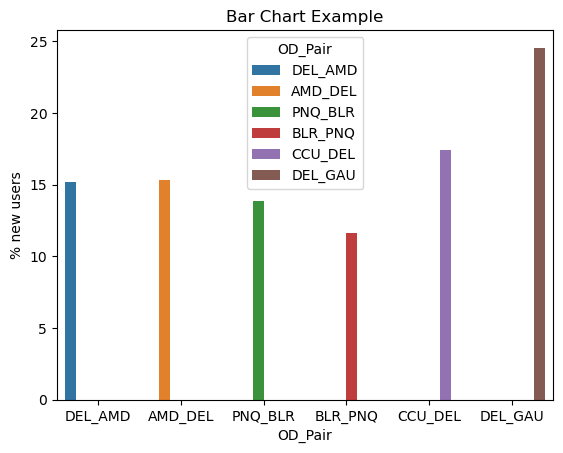

In [121]:
# Plotting the same
x, y = table1['OD_Pair'], table1['Percent new users (%)']
sns.barplot(x = x, y=y, hue = table1['OD_Pair'])
plt.xlabel('OD_Pair')
plt.ylabel('% new users')
plt.title('Bar Chart Example')

##### DEL-GAU & CCU-DEL are top sectors having maximum percentage of new users

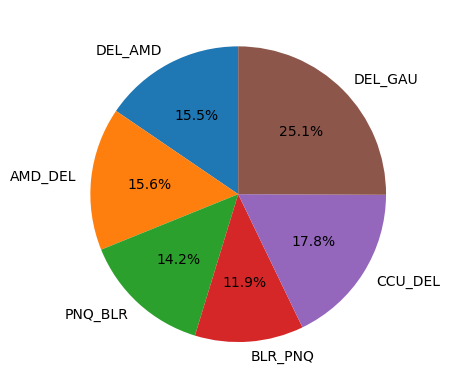

In [129]:
plt.pie(y,labels = x,autopct='%1.1f%%', startangle=90)
plt.show()

### Qu. 2) Find the number of users who have booked more than twice on our Web platforms?

iximweb-Mobile Web,  ixiweb-Web are only two web platforms. So separating these bookings first

In [23]:
web = data[data['devicePlatform'].isin(['iximweb','ixiweb'])]
web

,userId,bookingId,bookingDate,journeyType,isInternational,providerId,originCode,destinationCode,cabinClass,devicePlatform,totalFare,onwardDeparture,userType
5,530b3f8be4b05f086b0f147e,180605610826,2018-06-05 17:52:58,One way,FALSE,12,AMD,DEL,ECONOMY,ixiweb,6517,2018-06-05 14:50:00,oldUser
6,530b3f8be4b05f086b0f147e,18060720692,2018-06-07 04:45:52,One way,FALSE,12,DEL,AMD,ECONOMY,ixiweb,6361,2018-06-08 23:30:00,oldUser
9,534d3031e4b0c5fb4d34bc0e,4703645,2018-06-07 19:47:54,One way,FALSE,196,BLR,PNQ,ECONOMY,iximweb,3674,2018-07-24 18:00:00,newUser
15,5387083fe4b0f363526389a2,4867357,2018-06-15 21:25:22,One way,FALSE,196,DEL,AMD,ECONOMY,ixiweb,3440,2018-06-16 14:15:00,oldUser
20,53e91d41e4b0c45cfff878d4,18060751520,2018-06-07 13:10:59,One way,FALSE,12,BLR,PNQ,ECONOMY,ixiweb,5080,2018-06-15 07:35:00,oldUser
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5085,5b3679fdd9401f4a930c4ff8,EMT49048323,2018-06-30 00:15:11,Return,FALSE,205,PNQ,BLR,ECONOMY,iximweb,4944,2018-07-13 17:00:00,newUser
5086,5b36f03860a5bf75087e05f1,3006879366352,2018-06-30 08:23:28,One way,FALSE,103,DEL,AMD,ECONOMY,ixiweb,3735,2018-07-02 08:00:00,newUser
5090,5b375140be288d103b6bc706,3006882548790,2018-06-30 15:26:37,One way,FALSE,103,BLR,PNQ,ECONOMY,ixiweb,10695,2018-07-05 07:35:00,newUser
5091,5b375932be288d72e4313a32,EMT49084962,2018-06-30 15:51:24,One way,FALSE,205,CCU,DEL,ECONOMY,ixiweb,5220,2018-07-08 00:15:00,newUser


In [24]:
repeat = pd.pivot_table(web, index='userId', values='bookingId', aggfunc=np.size)
repeat.reset_index(inplace=True)
repeat = repeat[repeat['bookingId'] > 2]

print('Number of Users who have booked more than twice on our web platforms are: ', repeat.shape[0])   
## Solution to Question 2

Number of Users who have booked more than twice on our web platforms are:  31


#### Number of Users who have booked more than twice on our web platforms are:  31

### Qu.3) What is trend for Advance Bookers ? 

Advance bookers are the ones who book the tickets well in advance before actual departure date. This amount of well in advance is not defined in the problem statement. So for getting the trend I will be taking advance booking in terms of number of weeks before travel as advance booking

In [32]:
adv = data.copy()
adv['delta(weeks)'] = adv['onwardDeparture'].dt.date - adv['bookingDate'].dt.date
adv['delta(weeks)'] = adv['delta(weeks)'].astype(str)
adv['delta(weeks)'] = adv['delta(weeks)'].str[:2]
adv['delta(weeks)'] = round(adv['delta(weeks)'].astype(int)/7,0)
adv['delta(weeks)'] = adv['delta(weeks)'].astype(int)
print(adv.shape)
adv.sample(5)

(5098, 14)


,userId,bookingId,bookingDate,journeyType,isInternational,providerId,originCode,destinationCode,cabinClass,devicePlatform,totalFare,onwardDeparture,userType,delta(weeks)
4298,5afa80ef60a5bf4a634c2a84,PRL06EA73TJ,2018-06-20 18:35:22,Return,FALSE,1020,DEL,AMD,ECONOMY,iximaad,4406,2018-07-02 08:00:00,newUser,2
2363,59dcb56a2b7cfc41ac61a4df,180605600352,2018-06-05 13:24:51,One way,FALSE,12,CCU,DEL,ECONOMY,iximaad,2599,2018-07-21 17:50:00,oldUser,7
3541,5a806c17d9401f085afa1dd0,5067911,2018-06-26 08:54:19,One way,FALSE,196,BLR,PNQ,ECONOMY,ixiweb,6398,2018-06-29 20:40:00,newUser,0
2473,59ec4c102b7cfc386b6711e2,5026075,2018-06-23 23:44:01,One way,FALSE,196,AMD,DEL,ECONOMY,iximaad,4594,2018-07-07 16:50:00,oldUser,2
2054,59a28baf2b7cfc6cb9a9610f,220681676663,2018-06-22 20:43:01,Return,FALSE,103,PNQ,BLR,ECONOMY,iximaad,9248,2018-06-25 20:55:00,oldUser,0


In [27]:
adv_booking = pd.pivot_table(adv, values='bookingId', index='delta(weeks)', aggfunc=np.size)
adv_booking.reset_index(inplace = True)
adv_booking.columns = ['Week','bookings']
adv_booking

,Week,bookings
0,0,1200
1,1,919
2,2,907
3,3,652
4,4,420
5,5,239
6,6,198
7,7,132
8,8,114
9,9,106


It has been noted that there is a trend among customers to make less advance bookings as the departure date approaches. In other words, as the period between the booking and the departure date increases, the number of advance bookings tends to decrease

Text(0.5, 1.0, 'Advance Booking Trend')

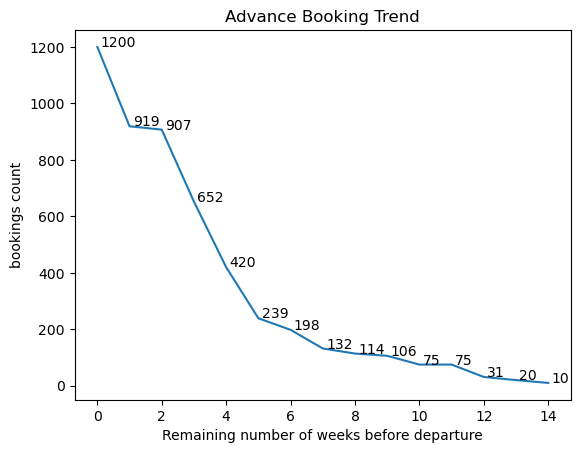

In [28]:
x, y = adv_booking['Week'], adv_booking['bookings']
plt.plot(x, y)
for i, j in zip(x, y):
    plt.text(i+0.1, j+0.1, str(j))
plt.xlabel('Remaining number of weeks before departure')
plt.ylabel('bookings count')
plt.title('Advance Booking Trend')   ### Solution to  Que. 3

### Qu.4) What percentage of bookings do we get through apps (Android + Ios)?

In [33]:
app = df[df['devicePlatform'].isin(['iximaad', 'iximaio', 'iximatr'])]
print(app.shape)
app.head()

(4088, 15)


,userId,bookingId,bookingDate,journeyType,isInternational,providerId,originCode,destinationCode,cabinClass,devicePlatform,totalFare,onwardDeparture,userType,OD_Pair,Booking Month
0,51b022a5e4b0aaef8f15cdb5,18062077104,2018-06-20 22:16:16,One way,FALSE,12,AMD,DEL,ECONOMY,iximaad,1937,2018-08-07 23:35:00,newUser,AMD_DEL,6
1,52381fa4e4b0802b434024be,180625154974,2018-06-25 15:51:48,One way,FALSE,12,DEL,GAU,ECONOMY,iximaad,4633,2018-07-27 12:50:00,oldUser,DEL_GAU,6
2,52d952bbe4b0093a9b9cbf78,180612183446,2018-06-12 20:33:36,One way,FALSE,12,PNQ,BLR,ECONOMY,iximaad,3889,2018-06-12 19:55:00,oldUser,PNQ_BLR,6
3,530779c1e4b00a4950542af3,0506840126041,2018-06-05 23:27:58,One way,FALSE,103,AMD,DEL,ECONOMY,iximaio,11984,2018-06-06 14:10:00,oldUser,AMD_DEL,6
4,530779c1e4b00a4950542af3,PRL06E2WAA3,2018-06-19 14:52:46,One way,FALSE,1020,DEL,GAU,ECONOMY,iximaio,6957,2018-06-20 05:20:00,oldUser,DEL_GAU,6


In [34]:
ans = round(app.shape[0]*100/df.shape[0],1)
print('We get {} % bookings through apps'.format(ans))  ## Solution to Que.4

We get 80.2 % bookings through apps


### Qu.5) Number of users who reactivate their account per month?

Again month will have to asssume from the booking date and not from the departure date, for the same reason as in Que. 1. Hence using same dataframe for study as used in Que.1

In [36]:
react = df[df['userType'] == 'Reactivated']
print(react.shape)
react.head()

(36, 15)


,userId,bookingId,bookingDate,journeyType,isInternational,providerId,originCode,destinationCode,cabinClass,devicePlatform,totalFare,onwardDeparture,userType,OD_Pair,Booking Month
18,53b8c181e4b0204b31409fb4,2506816369755,2018-06-25 15:36:46,One way,FALSE,103,CCU,DEL,ECONOMY,iximatr,9190,2018-06-26 00:15:00,Reactivated,CCU_DEL,6
33,549e5de7e4b05fe9a8547255,EMT48582573,2018-06-26 21:38:14,One way,FALSE,205,DEL,GAU,ECONOMY,iximaad,3346,2018-10-21 11:05:00,Reactivated,DEL_GAU,6
73,55452283e4b032c94ad36476,180605591698,2018-06-05 12:48:04,One way,FALSE,12,BLR,PNQ,ECONOMY,iximaad,1799,2018-07-19 18:00:00,Reactivated,BLR_PNQ,6
118,55779abbe4b0fb8aa06540c5,4690631,2018-06-07 10:43:09,One way,FALSE,196,CCU,DEL,ECONOMY,ixiweb,7186,2018-06-28 00:35:00,Reactivated,CCU_DEL,6
130,558a1261e4b08edf41dd5cb4,2706896482810,2018-06-27 11:31:09,Return,FALSE,103,DEL,AMD,ECONOMY,ixiweb,7524,2018-07-19 16:15:00,Reactivated,DEL_AMD,6


In [37]:
react_pv = pd.pivot_table(react, index='Booking Month', values='userId', aggfunc=lambda x: len(x.unique()))
react_pv.reset_index(inplace = True)
react_pv    ## Solution to Que 5

,Booking Month,userId
0,6,36


### 6) If you want to make cohorts of users who are likely to book international tickets, how would you identify and target them? Any one approach with proper explanation.

Lets check how many customers have booked international flights, althogh all the OD pairs were Indian Airports, just proofchecking will be good

In [38]:
print(data.isInternational.value_counts())

FALSE    5098
Name: isInternational, dtype: int64


none of the bookings in the dataset is international

#### To identify and target users who are likely to book international tickets, we could use a variety of approaches including demographic, behavioral, and psychographic targeting. 

1. **_Demographic targeting_**: One way to identify users who are likely to book international tickets is to target users who have previously booked international travel. This can be done by analyzing user dataset and identifying users who have previously booked international travel. In this dataset since <u>there is no customer with international booking, demographic approach cannot be applied<u>
    

2. **_Behavioral targeting_**: This approach is to analyze user behavior on website or app to identify users who are showing a strong interest in international travel. For example, we can track user search queries, clickstream data, and other user behavior data to identify users who are frequently searching for international destinations, researching flight prices, or looking at international travel guides. Once we have this data, we can use it to create targeted advertising campaigns that are designed to reach users who are actively considering international travel. <u> given dataset also does not have such data<u>

    
3. **_Psychographic targeting_**: A third approach is to target users based on their psychographic profile. This involves analyzing user data to identify common interests, values, personality traits, income group & educational background, that are associated with international travel. For example, we could target users who are interested in adventure travel, cultural experiences, or luxury travel. To gather this data, we can use surveys, social media data, and other sources of user data to identify common interests and values. Once we have this data, we can use it to create targeted advertising campaigns that are designed to reach users who are most likely to be interested in international travel.
    
**Psychographic targeting** can be somewhat used for cohorting the users having international travel traits, so, here we can use, totalFare & cabinClass to get some kind of idea about the same

In [40]:
internation_probable_df = data.copy()
internation_probable_df.head(3)

,userId,bookingId,bookingDate,journeyType,isInternational,providerId,originCode,destinationCode,cabinClass,devicePlatform,totalFare,onwardDeparture,userType
0,51b022a5e4b0aaef8f15cdb5,18062077104,2018-06-20 22:16:16,One way,FALSE,12,AMD,DEL,ECONOMY,iximaad,1937,2018-08-07 23:35:00,newUser
1,52381fa4e4b0802b434024be,180625154974,2018-06-25 15:51:48,One way,FALSE,12,DEL,GAU,ECONOMY,iximaad,4633,2018-07-27 12:50:00,oldUser
2,52d952bbe4b0093a9b9cbf78,180612183446,2018-06-12 20:33:36,One way,FALSE,12,PNQ,BLR,ECONOMY,iximaad,3889,2018-06-12 19:55:00,oldUser


Taking the asuumption from general international travel fares, that the users who have booked domestic flights with more than Rs. 15000 totalFare OR users who have booked in PREMIUM_ECONOMY OR BUSINESS cabinClass.
Above assumtions are based on the Psychographic approach of cohorting as these assumtions are based on the income level & luxury requirements

In [104]:
filter_contions = (data['totalFare'] > 15000) | (data['cabinClass'].isin(['PREMIUM_ECONOMY','BUSINESS']))
int_prob_df = data.loc[filter_contions]
int_prob_df

,userId,bookingId,bookingDate,journeyType,isInternational,providerId,originCode,destinationCode,cabinClass,devicePlatform,totalFare,onwardDeparture,userType
14,537e3ef1e4b0b3536aba557f,5118399,2018-06-28 08:44:05,Return,FALSE,196,CCU,DEL,ECONOMY,iximaio,15934,2018-11-16 14:00:00,oldUser
21,53f84078e4b02266e15c6928,180608144738,2018-06-08 10:25:31,Return,FALSE,12,DEL,AMD,ECONOMY,iximatr,15755,2018-06-09 02:10:00,oldUser
22,53fe06eae4b0614f2679fb69,5174225,2018-06-30 15:10:05,One way,FALSE,196,CCU,DEL,ECONOMY,iximaad,18191,2018-07-01 01:00:00,oldUser
51,54e5f2dfe4b0c99055e1bd29,5000453,2018-06-22 18:32:51,One way,FALSE,196,CCU,DEL,ECONOMY,iximaad,23744,2018-06-22 14:55:00,oldUser
60,551bb54de4b07f4e6d985c37,5024417,2018-06-23 22:17:11,One way,FALSE,196,CCU,DEL,ECONOMY,iximaad,16657,2018-09-30 01:35:00,oldUser
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,5b29b96ba978c50d146f1624,2006868222881,2018-06-20 08:02:08,One way,FALSE,103,CCU,DEL,ECONOMY,iximweb,20944,2018-12-24 08:15:00,newUser
4886,5b2a230660a5bf7899e1ffe2,2006894350331,2018-06-20 15:35:25,One way,FALSE,103,DEL,GAU,ECONOMY,iximatr,19545,2018-06-21 02:10:00,newUser
4919,5b2c85df60a5bf0abdcd6937,PRL06EI60GL,2018-06-22 10:55:21,Return,FALSE,1020,AMD,DEL,ECONOMY,ixiweb,23072,2018-06-25 14:10:00,newUser
4941,5b2dd3a5d9401f52e7585bee,2306882408536,2018-06-23 10:40:16,Return,FALSE,103,CCU,DEL,ECONOMY,ixiweb,20168,2018-06-28 02:05:00,newUser


For making cohort of users who are likely to book internation ticekts, we will be divding above 91 users into 3 categoris of probability (high, medium, low), showing high, medium & low probability of booking international tickets
1. **High**    : totalFare > 25000 OR cabinClass booked as BUSINESS class 
2. **Medium**  : total Fare > 20000 irrespectice of cabinClass 
3. **Low**     : total fare < 20000 irrespectice of cabinClass

In [105]:
cond_high = (int_prob_df['totalFare'] > 25000) | (int_prob_df['cabinClass'].isin(['BUSINESS']))
cond_medium = (int_prob_df['totalFare'] > 20000) & (int_prob_df['totalFare'] < 25000) & ~(cond_high)
cond_low = ~(cond_high | cond_medium)

In [106]:
int_prob_df['Probability'] = np.where(cond_high,'High', np.where(cond_medium, 'medium', 'Low'))
int_prob_df

/var/folders/m5/bqwsft9x0k1755l6s58g6zfh0000gn/T/ipykernel_87381/68359776.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  int_prob_df['Probability'] = np.where(cond_high,'High', np.where(cond_medium, 'medium', 'Low'))


,userId,bookingId,bookingDate,journeyType,isInternational,providerId,originCode,destinationCode,cabinClass,devicePlatform,totalFare,onwardDeparture,userType,Probability
14,537e3ef1e4b0b3536aba557f,5118399,2018-06-28 08:44:05,Return,FALSE,196,CCU,DEL,ECONOMY,iximaio,15934,2018-11-16 14:00:00,oldUser,Low
21,53f84078e4b02266e15c6928,180608144738,2018-06-08 10:25:31,Return,FALSE,12,DEL,AMD,ECONOMY,iximatr,15755,2018-06-09 02:10:00,oldUser,Low
22,53fe06eae4b0614f2679fb69,5174225,2018-06-30 15:10:05,One way,FALSE,196,CCU,DEL,ECONOMY,iximaad,18191,2018-07-01 01:00:00,oldUser,Low
51,54e5f2dfe4b0c99055e1bd29,5000453,2018-06-22 18:32:51,One way,FALSE,196,CCU,DEL,ECONOMY,iximaad,23744,2018-06-22 14:55:00,oldUser,medium
60,551bb54de4b07f4e6d985c37,5024417,2018-06-23 22:17:11,One way,FALSE,196,CCU,DEL,ECONOMY,iximaad,16657,2018-09-30 01:35:00,oldUser,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,5b29b96ba978c50d146f1624,2006868222881,2018-06-20 08:02:08,One way,FALSE,103,CCU,DEL,ECONOMY,iximweb,20944,2018-12-24 08:15:00,newUser,medium
4886,5b2a230660a5bf7899e1ffe2,2006894350331,2018-06-20 15:35:25,One way,FALSE,103,DEL,GAU,ECONOMY,iximatr,19545,2018-06-21 02:10:00,newUser,Low
4919,5b2c85df60a5bf0abdcd6937,PRL06EI60GL,2018-06-22 10:55:21,Return,FALSE,1020,AMD,DEL,ECONOMY,ixiweb,23072,2018-06-25 14:10:00,newUser,medium
4941,5b2dd3a5d9401f52e7585bee,2306882408536,2018-06-23 10:40:16,Return,FALSE,103,CCU,DEL,ECONOMY,ixiweb,20168,2018-06-28 02:05:00,newUser,medium


In [107]:
int_prob_df['Probability'].value_counts()

Low       55
medium    22
High      14
Name: Probability, dtype: int64

In [110]:
cohort = pd.pivot_table(int_prob_df, values = 'userId', index = 'Probability', aggfunc=lambda x: len(x.unique()))
cohort.reset_index(inplace = True)
cohort.columns = ['International Booking Probability', 'Users Count']
cohort.sort_values(by = 'Users Count', ascending = True, ignore_index = True, inplace = True)
cohort

,International Booking Probability,Users Count
0,High,13
1,medium,22
2,Low,50


<AxesSubplot:xlabel='International Booking Probability', ylabel='Users Count'>

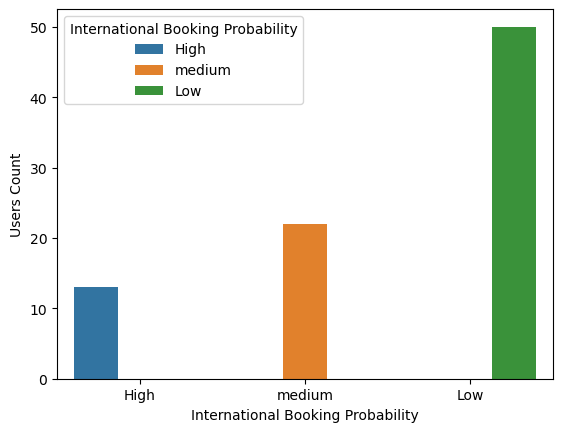

In [130]:
x = cohort['International Booking Probability']
y = cohort['Users Count']
sns.barplot(data = cohort, x=x, y=y,hue="International Booking Probability")

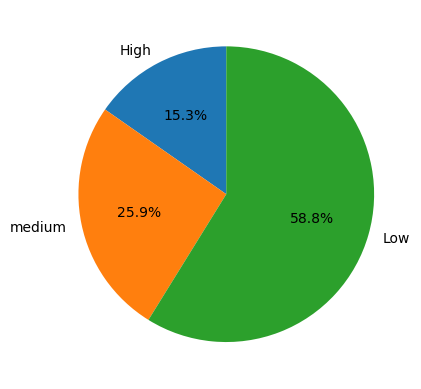

In [131]:
plt.pie(y,labels = x,autopct='%1.1f%%', startangle=90)
plt.show()

# <center><span style="color:violet">Thank you</span><center>